# Proyek Analisis Data: [Input Nama Dataset]
- **Nama:** [Zaskila Nurfadilla]
- **Email:** [@nurfadillazaskila24@gmail.com]
- **ID Dicoding:** []

## Menentukan Pertanyaan Bisnis

- Bagaimana pengaruh musim dan cuaca terhadap jumlah penyewaan sepeda?
- Apakah ada pola tertentu dalam penyewaan sepeda berdasarkan waktu hari dan hari dalam seminggu?

## Import Semua Packages/Library yang Digunakan

In [ ]:
# pip install pandas;


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

## Data Wrangling

### Gathering Data

In [ ]:
df_day = pd.read_csv('/day.csv')
df_day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,2011-01-03,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,2011-01-04,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,2011-01-05,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [ ]:
df_hours = pd.read_csv('/hour.csv')
df_hours.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


**Insight:**
"""**Insight:**
- Dataset berisi informasi tentang tanggal, musim, cuaca, suhu, kelembaban, kecepatan angin, dan jumlah penyewaan sepeda.
- Terdapat fitur-fitur penting seperti musim, cuaca, hr, dan workingday yang dapat mempengaruhi jumlah penyewaan.

### Assessing Data


### Assessing Data

In [ ]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


In [ ]:
df_day.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
holiday,0
weekday,0
workingday,0
weathersit,0
temp,0


In [ ]:
print("Jumlah duplikasi: ", df_day.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [ ]:
df_hours.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


In [ ]:
df_hours.isna().sum()

,0
instant,0
dteday,0
season,0
yr,0
mnth,0
hr,0
holiday,0
weekday,0
workingday,0
weathersit,0


In [ ]:
print("Jumlah duplikasi: ", df_hours.duplicated().sum())

Jumlah duplikasi:  0


In [ ]:
df_day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


**Insight:**
- Dataset terdiri dari berbagai jenis fitur, baik numerik maupun kategorikal.
- Beberapa fitur seperti liburan mungkin memerlukan penyesuaian atau konversi.

### Cleaning Data

In [ ]:
df_day['dteday'] = pd.to_datetime(df_day['dteday'])
df_day.dropna(inplace=True)

In [ ]:
df_day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [ ]:
df_day.dropna(inplace=True)

In [ ]:
df_hours['dteday'] = pd.to_datetime(df_hours['dteday'])
df_hours.dropna(inplace=True)

In [ ]:
df_hours.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

**Insight:**
- Format tanggal (dteday) telah dikonversi untuk analisis lebih lanjut
dari tipe object ke datetime64
- Data telah dibersihkan dari nilai yang hilang

## Exploratory Data Analysis (EDA)

### Explore ...

In [ ]:
df_day.describe()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2012-01-01 00:00:00,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
min,1.000000,2011-01-01 00:00:00,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2011-07-02 12:00:00,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,2012-01-01 00:00:00,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,2012-07-01 12:00:00,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,2012-12-31 00:00:00,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452


In [ ]:
df_day.groupby(by="season").cnt.nunique().sort_values(ascending=False)

,cnt
season,
3,188
2,182
1,179
4,176


In [ ]:
df_day.groupby(by="weathersit").cnt.nunique().sort_values(ascending=False)

,cnt
weathersit,
1,451
2,243
3,21


In [ ]:
df_day.groupby(by="weekday").cnt.nunique().sort_values(ascending=False)


,cnt
weekday,
0,104
1,104
2,104
5,104
3,103
4,103
6,102


In [ ]:
df_hours.groupby(by="hr").cnt.nunique().sort_values(ascending=True)

,cnt
hr,
4,25
5,58
3,60
2,100
1,120
0,162
6,187
23,196
22,252


In [ ]:
# prompt: df_hours.groupby(by="hr").cnt.nunique().sort_values(ascending=True) cara urutkan berdasarkan hr

df_hours.groupby(by="hr")['cnt'].nunique().sort_index()


,cnt
hr,
0,162
1,120
2,100
3,60
4,25
5,58
6,187
7,374
8,467


**Insight:**

1.Analisis data pada pernyataan 1
* Musim dengan Penyewaan Terbanyak:
Musim Gugur (Fall) memiliki jumlah penyewaan tertinggi, yaitu 188. Ini menunjukkan bahwa musim gugur adalah waktu paling populer untuk penyewaan sepeda di dataset ini.
* Musim dengan Penyewaan Terendah:
Musim Dingin (Winter) memiliki jumlah penyewaan terendah, yaitu 176. Ini mengindikasikan bahwa cuaca dingin mungkin mengurangi minat pada penyewaan sepeda
* Kondisi Cuaca Jernih (Code 1): Memiliki jumlah penyewaan tertinggi yaitu 451. Ini menunjukkan bahwa cuaca cerah atau sedikit awan adalah kondisi terbaik untuk penyewaan sepeda. Orang cenderung lebih banyak menyewa sepeda ketika cuaca mendukung aktivitas luar ruangan.
Kondisi Cuaca Berkabut:

* Kondisi Cuaca Berkabut (Code 2): Menghasilkan 243 penyewaan, yang masih cukup tinggi dibandingkan dengan kondisi cuaca buruk. Ini menunjukkan bahwa meskipun cuaca berkabut, masih banyak orang yang menyewa sepeda, tetapi tidak sebanyak pada kondisi cuaca cerah.
Kondisi Cuaca Buruk:

* Kondisi Cuaca Ringan Salju atau Hujan (Code 3): Memiliki jumlah penyewaan yang sangat rendah yaitu 21. Ini mengindikasikan bahwa kondisi cuaca buruk seperti salju ringan atau hujan membuat penyewaan sepeda sangat tidak populer.

2. 1.Analisis data pada pernyataan 2
* jika dilihat dari jumlah penyewaan berdasarkan hari dalam seminggu itu tidak memiliki pola tertentu, dan jumlah penyewaan hampir sama  tetapi jika dilihat dari segi waktu dapat kita temukan pola penyewaan dengan jam yang tertinggi yaitu pada pukul 18.00 dengan jumlah penyewaan tertinggi yaitu 31. Ini menunjukkan bahwa waktu sore menjelang malam adalah puncak penyewaan sepeda dan setelah puncak pada jam 18, jumlah penyewaan mulai menurun pada malam hari, dengan jumlah penyewaan terendah pada jam-jam malam larut (jam 0 sampai 4).

## Visualization & Explanatory Analysis

### Pertanyaan 1:

In [ ]:
#Bagaimana pengaruh musim dan cuaca terhadap jumlah penyewaan sepeda?

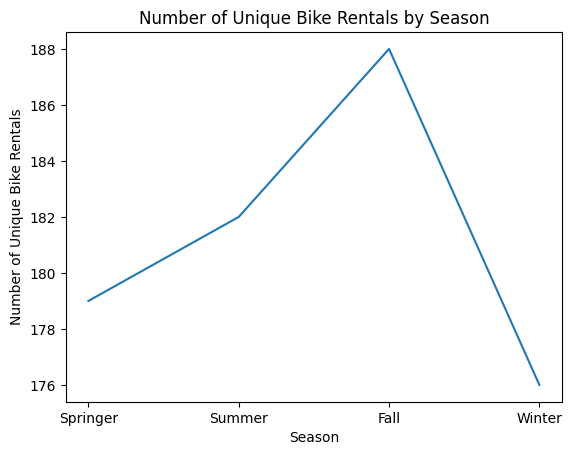

In [ ]:
import matplotlib.pyplot as plt

# Data yang akan diplot
x = df_day.groupby(by="season").cnt.nunique().index
y = df_day.groupby(by="season").cnt.nunique().values

# Mengubah label y menjadi string yang diinginkan
ylabel_mapping = {1: 'Springer', 2: 'Summer', 3: 'Fall', 4: 'Winter'}
new_ylabel = [ylabel_mapping[label] for label in x]

# Membuat plot diagram garis
plt.plot(new_ylabel, y)

# Menambahkan label sumbu x dan y
plt.xlabel("Season")
plt.ylabel("Number of Unique Bike Rentals")

# Menambahkan judul plot
plt.title("Number of Unique Bike Rentals by Season")

# Menampilkan plot
plt.show()


In [ ]:
# Menghitung jumlah penyewaan unik untuk setiap musim
season_counts = df_day.groupby('season')['cnt'].nunique()

# Menghitung persentase perubahan antara musim
percentage_changes = []
for i in range(len(season_counts) - 1):
  current_season = season_counts.index[i]
  next_season = season_counts.index[i+1]
  current_count = season_counts[current_season]
  next_count = season_counts[next_season]
  percentage_change = ((next_count - current_count) / current_count) * 100
  percentage_changes.append(percentage_change)

# Menampilkan persentase perubahan
print("Persentase perubahan penyewaan:")
print("Springer ke Summer:", percentage_changes[0], "%")
print("Summer ke Fall:", percentage_changes[1], "%")
print("Fall ke Winter:", percentage_changes[2], "%")


Persentase perubahan penyewaan:
Springer ke Summer: 1.675977653631285 %
Summer ke Fall: 3.296703296703297 %
Fall ke Winter: -6.382978723404255 %


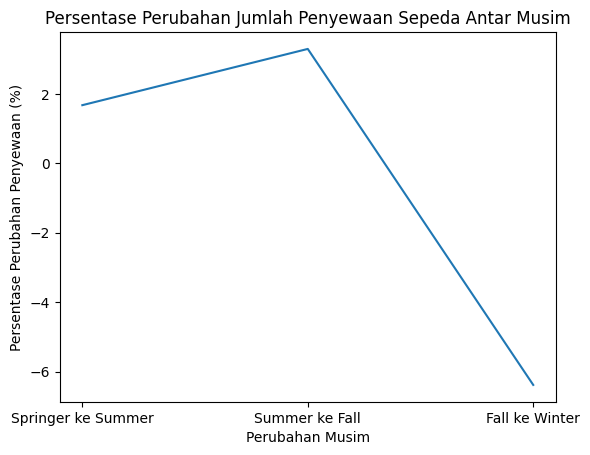

In [ ]:
# Data yang akan diplot
x = ['Springer ke Summer', 'Summer ke Fall', 'Fall ke Winter']
y = percentage_changes

# Membuat plot diagram garis
plt.plot(x, y)

# Menambahkan label sumbu x dan y
plt.xlabel("Perubahan Musim")
plt.ylabel("Persentase Perubahan Penyewaan (%)")

# Menambahkan judul plot
plt.title("Persentase Perubahan Jumlah Penyewaan Sepeda Antar Musim")

# Menampilkan plot
plt.show()


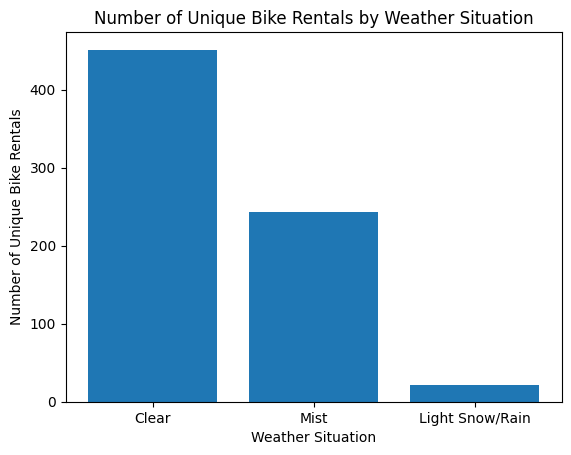

In [ ]:
# Data yang akan diplot
x = df_day.groupby(by="weathersit").cnt.nunique().index
y = df_day.groupby(by="weathersit").cnt.nunique().values

# Mengubah label x menjadi string yang diinginkan
xlabel_mapping = {1: 'Clear', 2: 'Mist', 3: 'Light Snow/Rain', 4: 'Heavy Rain/Snow/Fog'}
new_xlabel = [xlabel_mapping[label] for label in x]

# Membuat plot diagram batang
plt.bar(new_xlabel, y)

# Menambahkan label sumbu x dan y
plt.xlabel("Weather Situation")
plt.ylabel("Number of Unique Bike Rentals")

# Menambahkan judul plot
plt.title("Number of Unique Bike Rentals by Weather Situation")

# Menampilkan plot
plt.show()


### Pertanyaan 2:

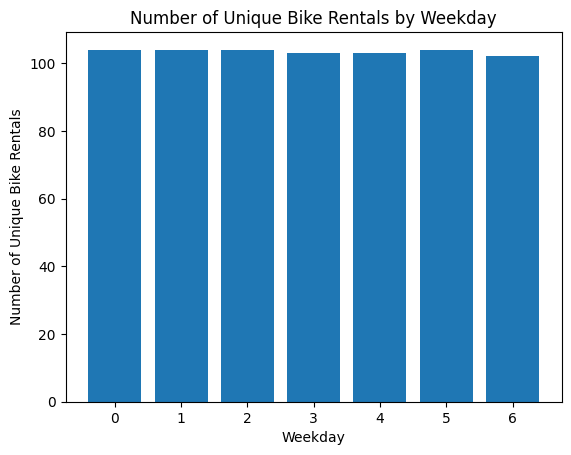

In [ ]:
weekday_counts = df_day.groupby(by="weekday").cnt.nunique().sort_values(ascending=False)

# Membuat plot diagram batang
plt.bar(weekday_counts.index, weekday_counts.values)

# Menambahkan label sumbu x dan y
plt.xlabel("Weekday")
plt.ylabel("Number of Unique Bike Rentals")

# Menambahkan judul plot
plt.title("Number of Unique Bike Rentals by Weekday")

# Menampilkan plot
plt.show()


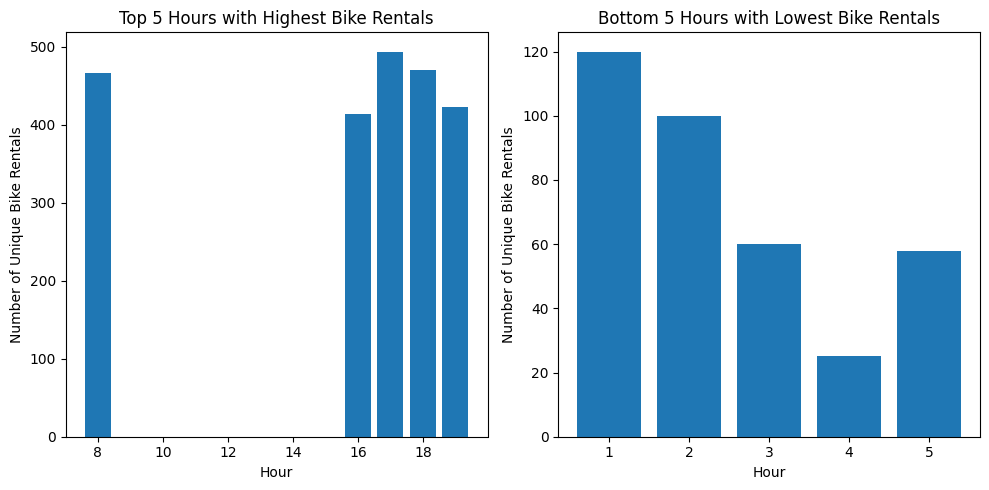

In [ ]:
# Mengambil data jumlah penyewaan unik per jam
hourly_rental_counts = df_hours.groupby(by="hr")['cnt'].nunique().sort_index()

# Mengurutkan data berdasarkan jumlah penyewaan
sorted_hourly_rental_counts = hourly_rental_counts.sort_values(ascending=False)

# Mengambil 5 data dengan performa terbaik
top_5_hours = sorted_hourly_rental_counts.head(5)

# Mengambil 5 data dengan performa terendah
bottom_5_hours = sorted_hourly_rental_counts.tail(5)

# Membuat plot untuk 5 data dengan performa terbaik
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(top_5_hours.index, top_5_hours.values)
plt.xlabel("Hour")
plt.ylabel("Number of Unique Bike Rentals")
plt.title("Top 5 Hours with Highest Bike Rentals")

# Membuat plot untuk 5 data dengan performa terendah
plt.subplot(1, 2, 2)
plt.bar(bottom_5_hours.index, bottom_5_hours.values)
plt.xlabel("Hour")
plt.ylabel("Number of Unique Bike Rentals")
plt.title("Bottom 5 Hours with Lowest Bike Rentals")

plt.tight_layout()
plt.show()


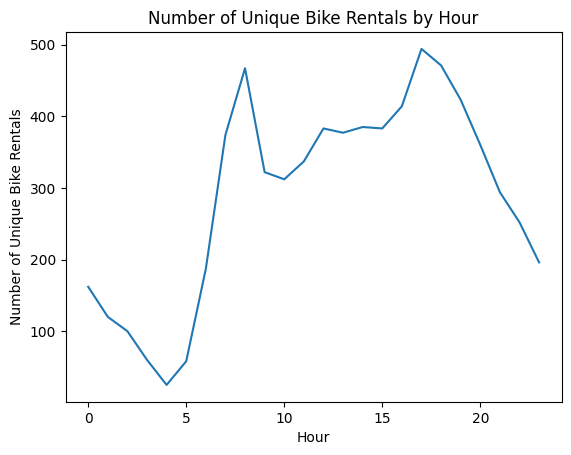

In [ ]:
# Mengambil data jumlah penyewaan unik per jam
hourly_rental_counts = df_hours.groupby(by="hr")['cnt'].nunique().sort_index()

# Membuat plot diagram garis
plt.plot(hourly_rental_counts.index, hourly_rental_counts.values)

# Menambahkan label sumbu x dan y
plt.xlabel("Hour")
plt.ylabel("Number of Unique Bike Rentals")

# Menambahkan judul plot
plt.title("Number of Unique Bike Rentals by Hour")

# Menampilkan plot
plt.show()


**Insight:**
- Musim gugur adalah waktu paling populer untuk penyewaan sepeda, sedangkan musim dingin paling sedikit. Cuaca cerah mendorong penyewaan tertinggi, sedangkan salju atau hujan mengurangi minat secara signifikan.
- Penyewaan sepeda mencapai puncaknya pada pukul 18.00, sementara malam hari, terutama dari jam 00.00 sampai 04.00, memiliki jumlah penyewaan terendah.

## Analisis Lanjutan (Opsional)

## Conclusion

- Pengaruh jumlah penyewaan sangat mempengaruhi terhadap musim yang ada dimana musim penyewaan paling tinggi ada pada musim gugur mengalami penururan pada musin dingin.
- Jumlah penyewaan sepeda memiliki pengaruh terhadap jam penyewaan tetapi tidak memiliki pengaruh terhadap hari penyewaan karena rata-rata penyewaan sepeda setiap hari hampir sama. Tetapi jika dilihat dari pengaruh jam penyewaan memiliki pengaruh dan dapat disimpulkan bahwa jam 16.00 dan puncak jam tertinggi ada pada jam 18.00 dan jumlah penyewaan paling rendah yaitu jam 00.00 sampai 04.00